# Pyber Ride Sharing

In [1]:
#Dependeicies
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import json
import numpy as np
import seaborn as sns

### Read City Dataset

In [2]:
csv_path2 = "city_data.csv"
city = pd.read_csv(csv_path2)
city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
driver = city.groupby(['city']).sum()
#driver.head()
driver["driver_count"].head()

city
Alvarezhaven    21
Alyssaberg      67
Anitamouth      16
Antoniomouth    21
Aprilchester    49
Name: driver_count, dtype: int64

In [4]:
city.shape

(126, 3)

### Read Ride Dataset

In [5]:
csv_path = "ride_data.csv"
ride = pd.read_csv(csv_path)
ride.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
ride.shape

(2375, 4)

### Analysis

In [7]:
# New dataset
# Merging city dataset and ride dataset
merge_data = ride.merge(city, on='city', how='inner')
merged_data = pd.DataFrame(merge_data)
merged_data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [8]:
# Total fare per city 
price_data = merged_data.groupby(["city"]).sum()["fare"]
# Total count of ride per city
count_ride = merged_data.groupby(["city"]).count()["date"]
# Average price per city 
av_price =merged_data.groupby(["city"]).mean()["fare"]
#av_price = price_data / count_ride


In [9]:
# Average Fee per city
av_fee = merged_data.groupby(["city", "type"]).mean()["fare"]
# Number of ride per city
ride_count = merged_data.groupby(["city", "type"]).count()["date"]

In [10]:
# Splitting dataset by type 
Urban = (merged_data.loc[merged_data['type'] == "Urban"])
Rural = (merged_data.loc[merged_data['type'] == "Rural"])
Suburban = (merged_data.loc[merged_data['type'] == "Suburban"])

In [11]:
# Aversge fee and ride count per Urban
Urban_av_fee = Urban.groupby(['city']).mean()["fare"]
Urban_ride_count = Urban.groupby(['city']).count()["date"]
# Aversge fee and ride count per Suburban
Suburban_av_fee = Suburban.groupby(['city']).mean()["fare"]
Suburban_ride_count = Suburban.groupby(['city']).count()["date"]
# Aversge fee and ride count per Rural
Rural_av_fee = Rural.groupby(['city']).mean()["fare"]
Rural_ride_count = Rural.groupby(['city']).count()["date"]

### Bubble Plot of Ride Sharing Data

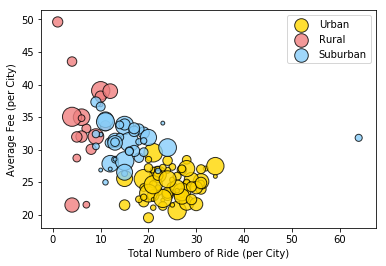

In [12]:
plt.scatter(Urban_ride_count, Urban_av_fee, s=driver["driver_count"]*5, c='gold', edgecolor = "black", alpha=0.8)
plt.scatter(Rural_ride_count, Rural_av_fee, s=driver["driver_count"]*5, c='lightcoral', edgecolor = "black",alpha=0.8)
plt.scatter(Suburban_ride_count, Suburban_av_fee, s=driver["driver_count"]*5, c='lightskyblue', edgecolor = "black", alpha=0.8)
legend = ["Urban", "Rural", "Suburban"]
plt.xlabel("Total Numbero of Ride (per City)")
plt.ylabel("Average Fee (per City)")
plt.legend(legend)
plt.show()

### Total fares by City Type

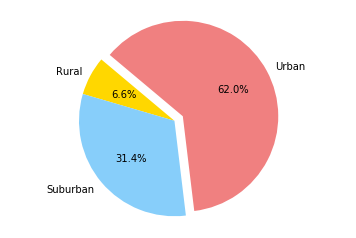

In [13]:
labels = ['Rural', 'Suburban', 'Urban']
colors = ['Gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
fare_type = merged_data.groupby(["type"]).sum()["fare"]
fare_type
plt.pie(fare_type, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.show()

### Total rides by City Type

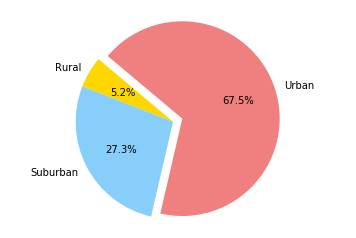

In [14]:
rides_type = merged_data.groupby(["type"]).count()["fare"]
rides_type
labels = ['Rural', 'Suburban', 'Urban']
colors = ['Gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.pie(rides_type, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.show()

### Total drivers by City Type

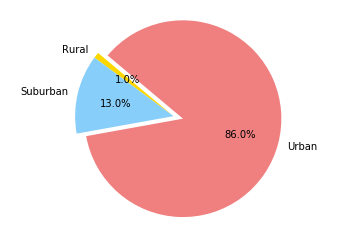

In [15]:
driver_type = merged_data.groupby(["type"]).sum()["driver_count"]
driver_update = driver_type / merged_data["driver_count"].sum()
labels = ['Rural', 'Suburban', 'Urban']
colors = ['Gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.pie(driver_update, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.show()